In [1]:
import pandas as pd
import os

# LOADING DATASET

In [2]:
files = os.listdir("company_xyz")

In [3]:
data = pd.DataFrame()

In [5]:
for file in files:
    df=pd.read_csv("company_xyz/"+file)
    data = pd.concat([data,df])

# DATA EXPLORATION

In [7]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


In [8]:
print("The number of rows in the dataset are ",data.shape[0])
print("The number of columns in the dataset are ",data.shape[1])

The number of rows in the dataset are  1000
The number of columns in the dataset are  17


In [9]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [10]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


In [ ]:
# There is no missing datas in any of the columns.
# The range of the unit for the commodities are more disperse(likely ouliers-Range larger that the mean).
# The quality of goods purchase by customers are consistent.
# The is an issue of outliers in the Total price columns(average and median are far apart)
# There is an issue of outliers in the cost of goods sold (the range far outweight  std)
# There is data issue in 5% tax column have the same value with gross income value. 
# The customers satisfaction rating is encouraging

In [11]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 327
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# DEALING WITH DATETIME FEATURES

In [13]:
import datetime as dt

In [17]:
data['Date']=pd.to_datetime(data.Date)

In [18]:
data['Date'].dtype

dtype('<M8[ns]')

In [19]:
data['Time']=pd.to_datetime(data.Time) 

In [20]:
data['Time'].dtype

dtype('<M8[ns]')

In [22]:
data['Day']= pd.to_datetime(data.Date).dt.day

In [23]:
data['Month']= pd.to_datetime(data.Date).dt.month

In [24]:
data['Year']= pd.to_datetime(data.Date).dt.year

In [25]:
data['Hour']= pd.to_datetime(data.Time).dt.hour

In [27]:
data.head(1)           # Brief display of the datetime features

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,2023-11-04 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13


In [28]:
data['Hour'].nunique()

11

In [29]:
data['Hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

# UNIQUE VALUES IN COLUMNS

In [30]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Day', 'Month', 'Year', 'Hour'],
      dtype='object')

In [31]:
data['City'].unique()

array(['Abuja', 'Lagos', 'Port Harcourt'], dtype=object)

In [32]:
data['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [34]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [35]:
data['Product line'].unique()

array(['Food and beverages', 'Fashion accessories',
       'Electronic accessories', 'Sports and travel',
       'Home and lifestyle', 'Health and beauty'], dtype=object)

In [36]:
data['Payment'].unique()

array(['Card', 'Epay', 'Cash'], dtype=object)

In [37]:
data['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

In [39]:
data['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [40]:
data['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [41]:
data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [42]:
data['Payment'].value_counts()

Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64

# AGGREGATION WITH GROUPBY

In [44]:
dat_city= data.groupby('City')

In [45]:
dat_city.agg(['sum','mean'])

C:\Users\hp\AppData\Local\Temp\ipykernel_11564\3517954437.py:1: FutureWarning: ['Invoice ID', 'Branch', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  dat_city.agg(['sum','mean'])


Unit price               Quantity                Tax 5%  \
                     sum          mean      sum      mean         sum   
City                                                                    
Abuja          6652396.8  20037.339759     1820  5.481928  1820531.52   
Lagos          6705176.4  19721.107059     1859  5.467647  1820577.78   
Port Harcourt  6684393.6  20379.248780     1831  5.582317  1895463.54   

                                  Total                       cogs  \
                      mean          sum           mean         sum   
City                                                                 
Abuja          5483.528675  38231161.92  115154.102169  36410630.4   
Lagos          5354.640529  38232133.38  112447.451118  36411555.6   
Port Harcourt  5778.852256  39804734.34  121355.897378  37909270.8   

                              ...  Rating             Day            Month  \
                        mean  ...     sum      mean   sum       mean   sum   
City                          ...                                            
Abuja          109670.573494  ...  2263.6  6.818072  5068  15.265060   665   
Lagos          107092.810588  ...  2389.2  7.027059  5232  15.388235   688   
Port Harcourt  115577.045122  ...  2319.9  7.072866  4956  15.109756   640   

                           Year          Hour             
                   mean     sum    mean   sum       mean  
City                                                      
Abuja          2.003012  670308  2019.0  5029  15.147590  
Lagos          2.023529  686460  2019.0  4987  14.667647  
Port Harcourt  1.951220  662232  2019.0  4894  14.920732  

[3 rows x 24 columns]

In [49]:
dat_city['gross income'].sum().sort_values(ascending=False)    # Port Harcourt city has the highest total gross income

City
Port Harcourt    1895463.54
Lagos            1820577.78
Abuja            1820531.52
Name: gross income, dtype: float64

In [51]:
data['Unit price'].mean()    # Average unit price

20041.9668

In [54]:
data["Quantity"].sort_values(ascending=False).head(3)

50     10
7      10
106    10
Name: Quantity, dtype: int64

# DATA  VISUALIZATION

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Branch', ylabel='count'>

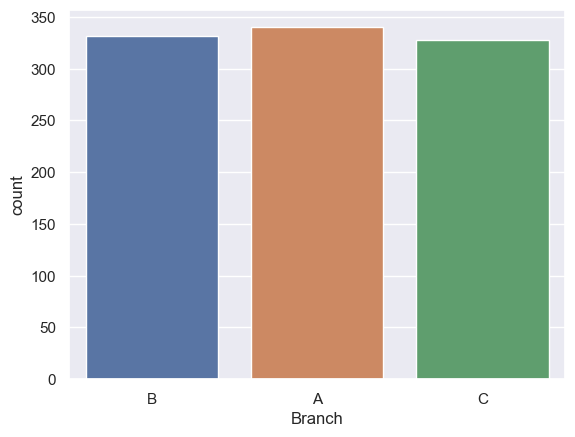

In [58]:
sns.set_theme(style="darkgrid")
sns.countplot(x='Branch', data=data)         # Lagos Branch recorded the highest sales

<Axes: xlabel='Payment', ylabel='count'>

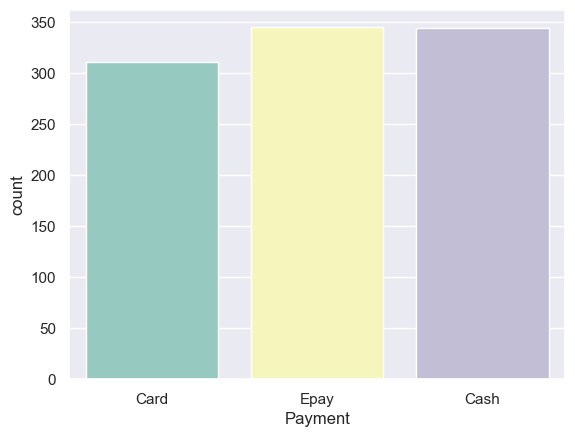

In [61]:
sns.countplot(x='Payment', palette="Set3", data=data) # Epay is the most used method of payment

<Axes: xlabel='City', ylabel='count'>

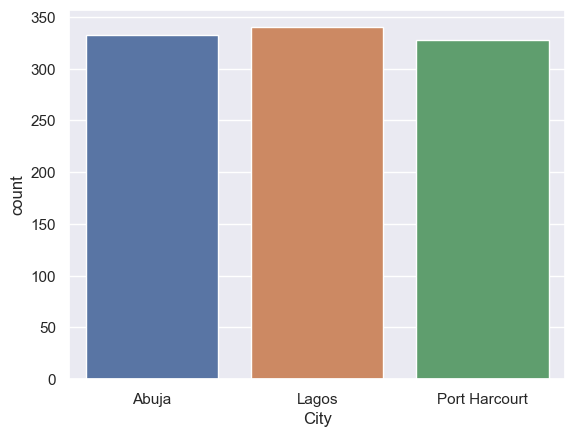

In [62]:
sns.countplot(x="City", data=data)           # Lagos city recorder the highest sales

<Axes: xlabel='count', ylabel='Product line'>

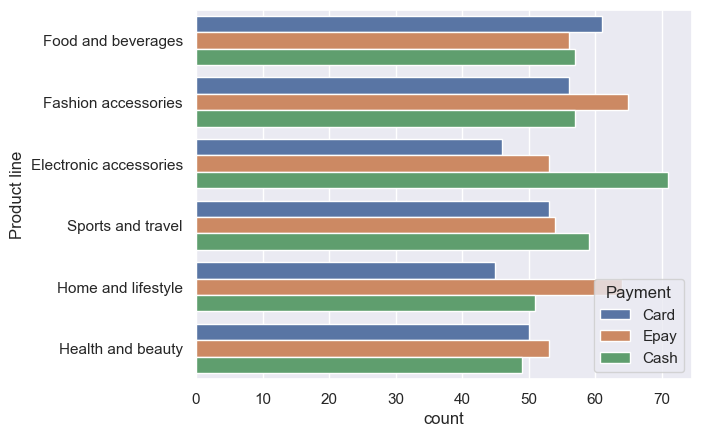

In [64]:
sns.countplot(y="Product line", hue="Payment",data=data) # electronic accessories is the highest product line sold
                                                         # while Home and lifestyle is smallest product line sold

<Axes: xlabel='Gender', ylabel='Quantity'>

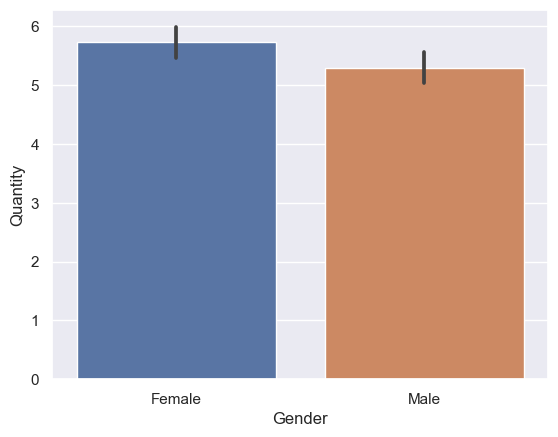

In [65]:
sns.barplot(x="Gender", y="Quantity", data=data)     # Females folks purchared more goods

<Axes: xlabel='Month', ylabel='count'>

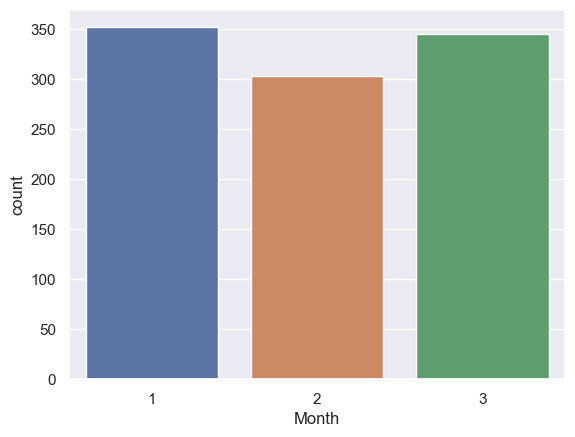

In [66]:
sns.countplot(x="Month",data=data)                     # January recorded the highest sales.

<Axes: xlabel='Month', ylabel='gross income'>

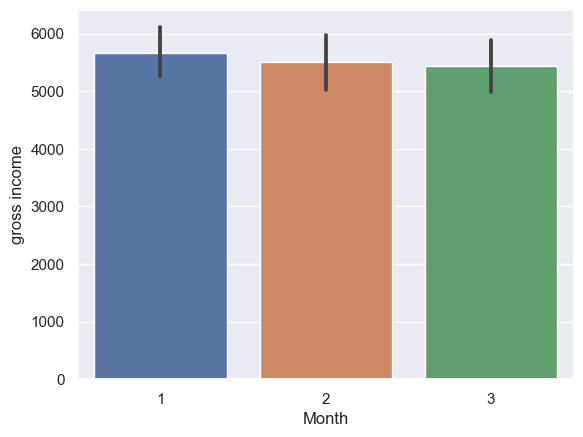

In [68]:
sns.barplot(x="Month",y="gross income", data=data)          # January recorded more gross income